In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from copy import copy, deepcopy
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
pd.options.display.max_columns = 100

### 1. Read Data from Csv Files:

In [2]:
traindf = pd.read_csv('training.csv')
testdf = pd.read_csv('testingCandidate.csv')

### 2. Data Understanding:
    
Let us look at the top few rows to understand the variables and the nature of data

In [3]:
traindf.shape,testdf.shape

((8238, 24), (32950, 22))

In [4]:
traindf.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,49.0,self-employed,married,basic.9y,no,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,999.0,0,no,NaN,1
1,NaN,housemaid,married,professional.course,no,no,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN,2
2,45.0,management,divorced,university.degree,no,no,no,cellular,apr,tue,2,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,999.0,0,no,NaN,3


In [5]:
testdf.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,38.0,self-employed,married,high.school,no,yes,no,telephone,jul,tue,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,1
1,40.0,self-employed,married,NaN,no,no,no,cellular,apr,thu,10,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,999.0,0,2
2,NaN,unemployed,single,university.degree,no,yes,no,cellular,aug,thu,2,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,999.0,0,3


Now let us look at the distribution of data in each of these columns

In [6]:
traindf.describe()

/Users/MaxTan/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,928.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,172.112069,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,128.999186,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-276.000000,1.000000
25%,NaN,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,NaN,2060.250000
50%,NaN,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,NaN,4119.500000
75%,NaN,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,NaN,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


In [7]:
testdf.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
count,24908.000000,32950.000000,32950.000000,32950.00000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.035852,2.576571,962.865190,0.17044,0.088258,93.576836,-40.483772,3.629882,5167.400920,962.655163,0.341730,16475.500000
std,10.425448,2.784839,185.953677,0.48993,1.572019,0.578857,4.622585,1.732277,72.128548,187.033081,1.246076,9511.990021
min,17.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,1.000000
25%,NaN,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,999.000000,0.000000,8238.250000
50%,NaN,2.000000,999.000000,0.00000,1.100000,93.798000,-41.800000,4.857000,5191.000000,999.000000,0.000000,16475.500000
75%,NaN,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,24712.750000
max,98.000000,56.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,28.000000,32950.000000


It seems NaN values are present in only two (custAge and profit) in training data and in only one (custAge) in test data. But it's only for quantitative features.
So let us count the number of missing values in all columns.

In [8]:
labels = []
values = []
for col in traindf.columns:
    labels.append(col)
    values.append(traindf[col].isnull().sum())
    print(col, values[-1])

('custAge', 2014)
('profession', 0)
('marital', 0)
('schooling', 2406)
('default', 0)
('housing', 0)
('loan', 0)
('contact', 0)
('month', 0)
('day_of_week', 787)
('campaign', 0)
('pdays', 0)
('previous', 0)
('poutcome', 0)
('emp.var.rate', 0)
('cons.price.idx', 0)
('cons.conf.idx', 0)
('euribor3m', 0)
('nr.employed', 0)
('pmonths', 0)
('pastEmail', 0)
('responded', 0)
('profit', 7310)
('id', 0)


Let's visualize the results to see the distribtion of missing values.

In [9]:
traindf.head(100)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,49.0,self-employed,married,basic.9y,no,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,999.0,0,no,NaN,1
1,NaN,housemaid,married,professional.course,no,no,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN,2
2,45.0,management,divorced,university.degree,no,no,no,cellular,apr,tue,2,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,999.0,0,no,NaN,3
3,44.0,blue-collar,married,basic.4y,unknown,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,999.0,0,no,NaN,4
4,38.0,blue-collar,married,NaN,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no,NaN,5
5,43.0,technician,single,university.degree,no,yes,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,999.0,0,no,NaN,6
6,39.0,admin.,married,NaN,unknown,yes,no,telephone,may,tue,5,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,no,NaN,7
7,53.0,entrepreneur,married,university.degree,no,yes,no,cellular,aug,fri,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,999.0,0,no,NaN,8
8,44.0,management,married,NaN,no,no,no,cellular,apr,mon,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,999.0,0,no,NaN,9
9,33.0,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,tue,2,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,999.0,4,no,NaN,10


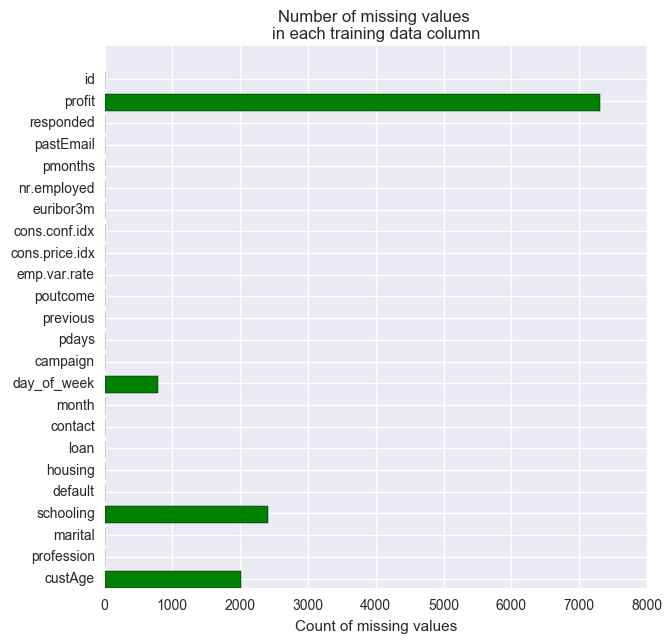

In [10]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(7,7))
rects = ax.barh(ind, np.array(values), color='g')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values \nin each training data column")
#autolabel(rects)
plt.savefig('na_training.jpg')
plt.show()

Do the same analysis and visualization to test data.

In [11]:
labels = []
values = []
for col in testdf.columns:
    labels.append(col)
    values.append(testdf[col].isnull().sum())
    print(col, values[-1])

('custAge', 8042)
('profession', 0)
('marital', 0)
('schooling', 9770)
('default', 0)
('housing', 0)
('loan', 0)
('contact', 0)
('month', 0)
('day_of_week', 3328)
('campaign', 0)
('pdays', 0)
('previous', 0)
('poutcome', 0)
('emp.var.rate', 0)
('cons.price.idx', 0)
('cons.conf.idx', 0)
('euribor3m', 0)
('nr.employed', 0)
('pmonths', 0)
('pastEmail', 0)
('id', 0)


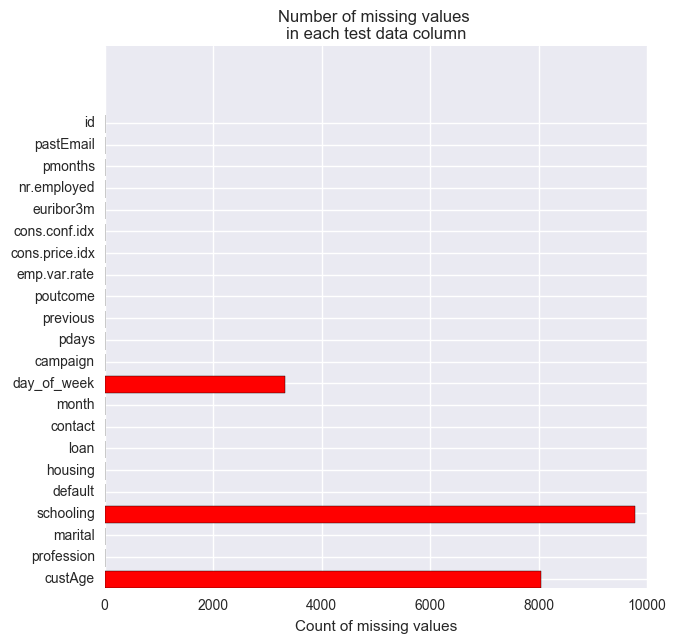

In [12]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(7,7))
rects = ax.barh(ind, np.array(values), color='r')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values \nin each test data column")
#autolabel(rects)
plt.savefig('na_test.jpg')
plt.show()

In this case, 4 features 'custAge', 'schooling', 'day_of_week' and 'profit' have NaN for training data and test data. And we can see their distribution according to plots above.

Next, let's take a look at all responses' distribution in the training data.

In [13]:
traindf.columns

Index([u'custAge', u'profession', u'marital', u'schooling', u'default',
       u'housing', u'loan', u'contact', u'month', u'day_of_week', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'pmonths',
       u'pastEmail', u'responded', u'profit', u'id'],
      dtype='object')

There are 24 columns in total in training dataset.
We first see distributions of numeric columns

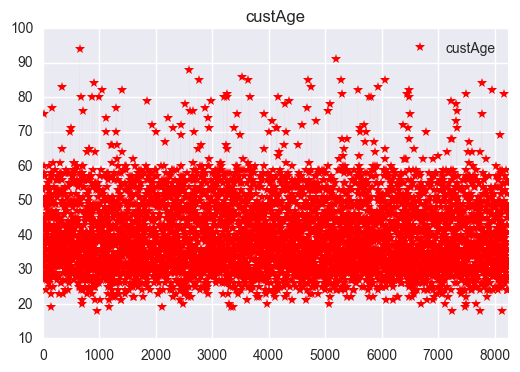

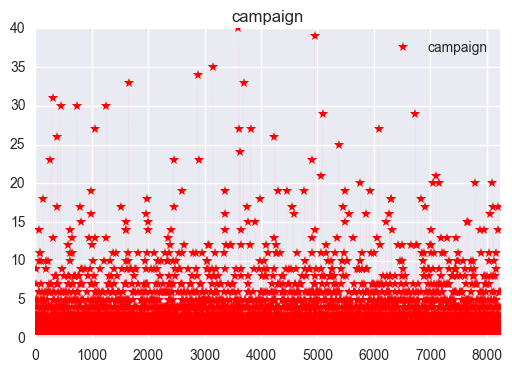

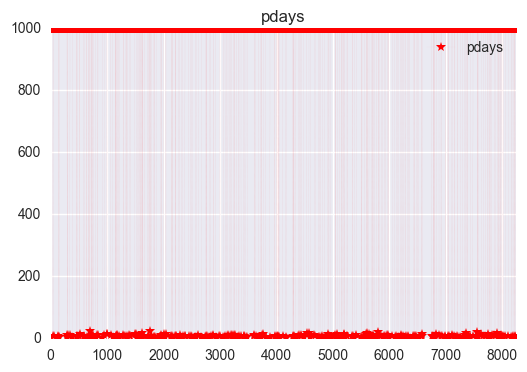

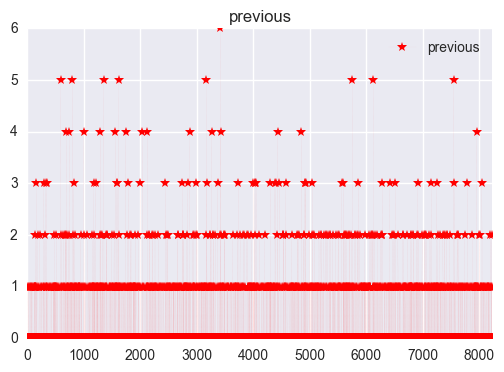

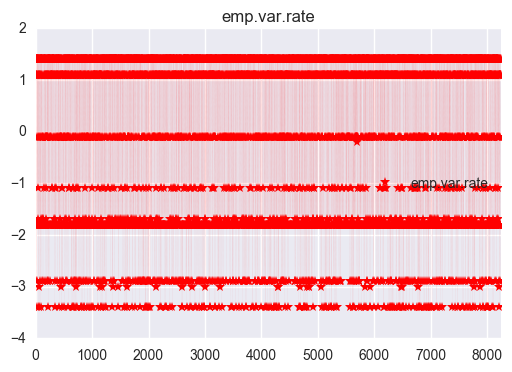

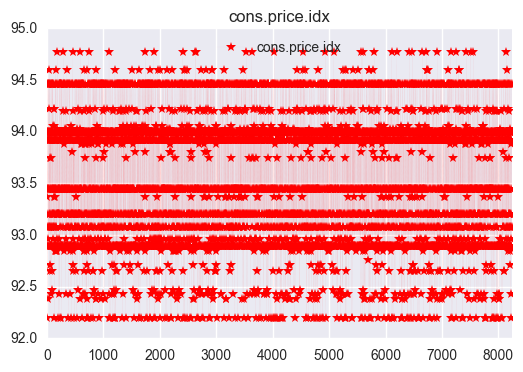

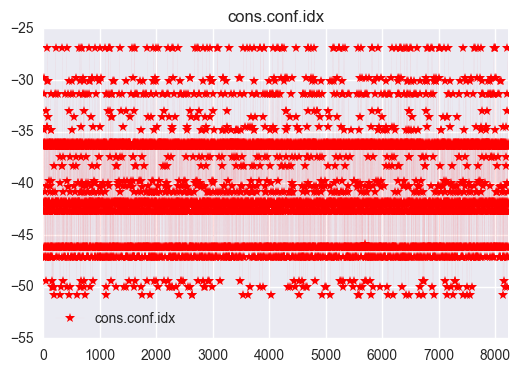

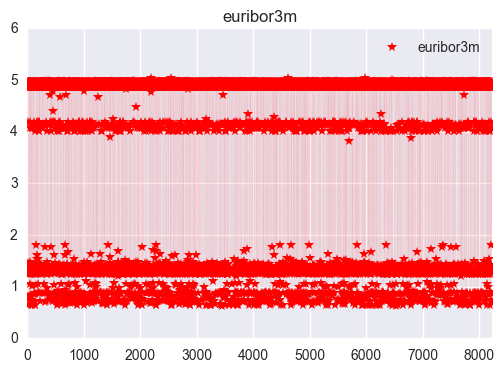

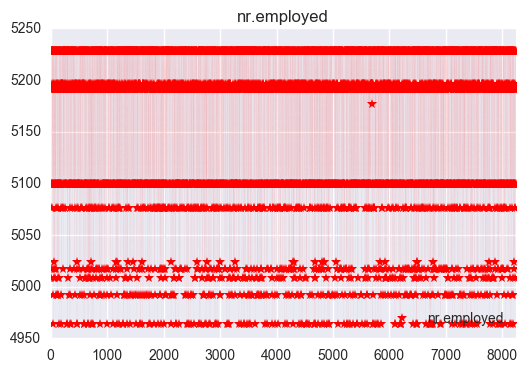

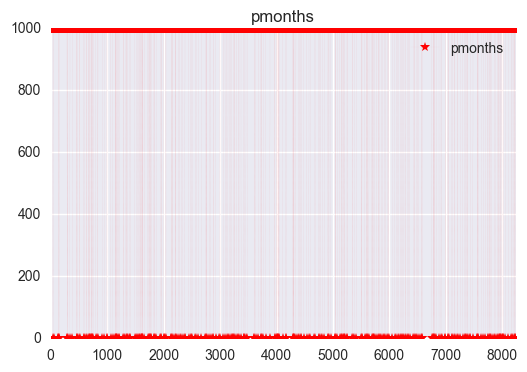

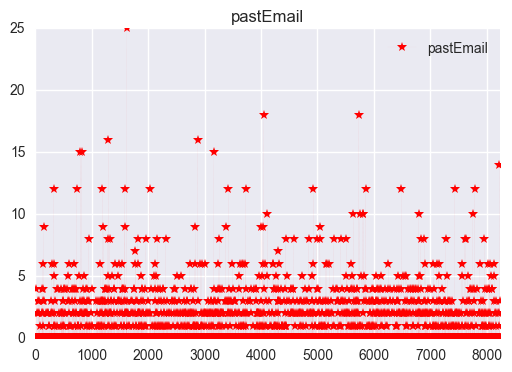

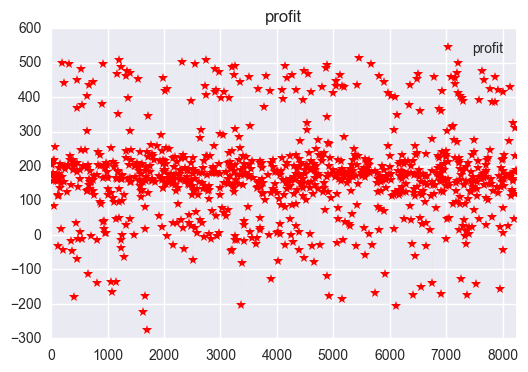

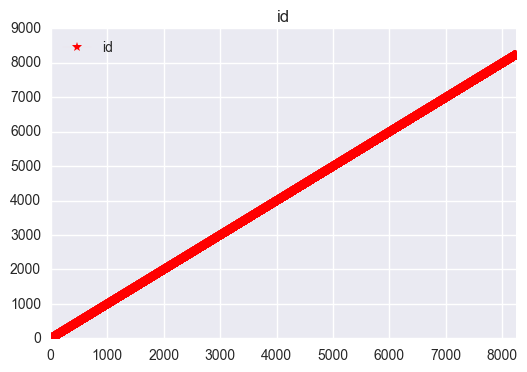

In [14]:
num_feat = []
cat_feat = []
for col in traindf.columns:
    try:
        plot = traindf[[col]].iloc[:,:].plot(marker='*',title =col, color="r", linewidth=0.01)
        #traindf[[col]].iloc[:,:].plot(marker='.',title =col, linewidth=0.01)
        num_feat.append(col)
        fig = plot.get_figure()
        fig.savefig(col+".png")
    except TypeError:
        cat_feat.append(col)
    

In [15]:
print len(cat_feat),len(num_feat)

11 13


In this case, we found out there are 11 categorical columns and 13 numeric columns.
Then, we take a look at distributions of those categorical columns.

In [16]:
for col in cat_feat:
    print traindf[col].value_counts()
    print '***\n'

admin.           2102
blue-collar      1847
technician       1351
services          792
management        583
retired           337
entrepreneur      314
self-employed     279
housemaid         213
unemployed        190
student           159
unknown            71
Name: profession, dtype: int64
***

married     4957
single      2339
divorced     932
unknown       10
Name: marital, dtype: int64
***

university.degree      1731
high.school            1340
basic.9y                863
professional.course     738
basic.4y                586
basic.6y                313
unknown                 260
illiterate                1
Name: schooling, dtype: int64
***

no         6619
unknown    1618
yes           1
Name: default, dtype: int64
***

yes        4300
no         3754
unknown     184
Name: housing, dtype: int64
***

no         6775
yes        1279
unknown     184
Name: loan, dtype: int64
***

cellular     5243
telephone    2995
Name: contact, dtype: int64
***

may    2814
jul    1352
aug    

In [17]:
np.nanmax(traindf.profit.values)

515.0

In [18]:
np.nanmin(traindf.profit.values)

-276.0

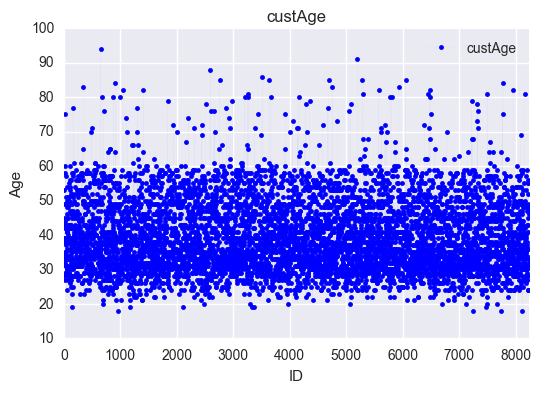

In [19]:
col = 'custAge'
plot = traindf[[col]].iloc[:,:].plot(marker='.',title =col, color="b", linewidth=0.01)
plot.set_xlabel("ID")
plot.set_ylabel("Age")
fig = plot.get_figure()
fig.savefig(col+".png")

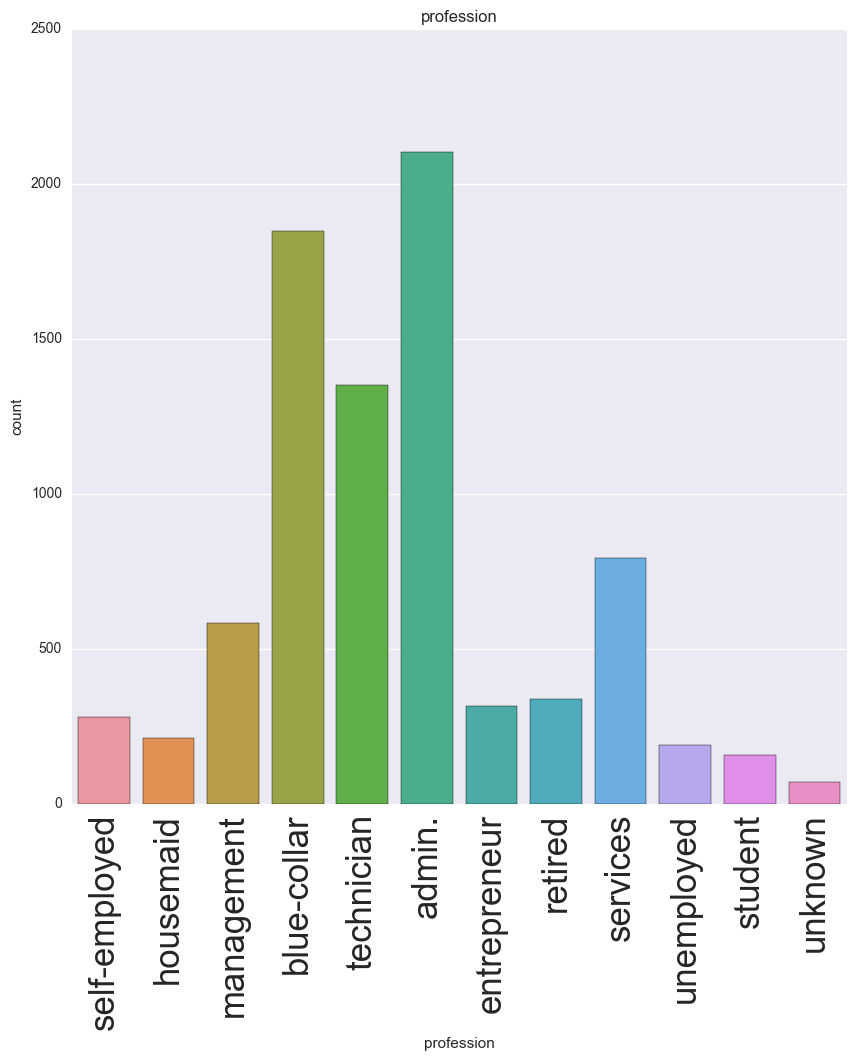

In [20]:
col = 'profession'
plt.figure(figsize=(10,10))
ax = sns.countplot(x=col, data=traindf)
plt.xticks(rotation='vertical',size = 25)
plt.title(col)
#plt.xlabel(col)
plt.savefig(col+'.png')
plt.show()
plt.close()


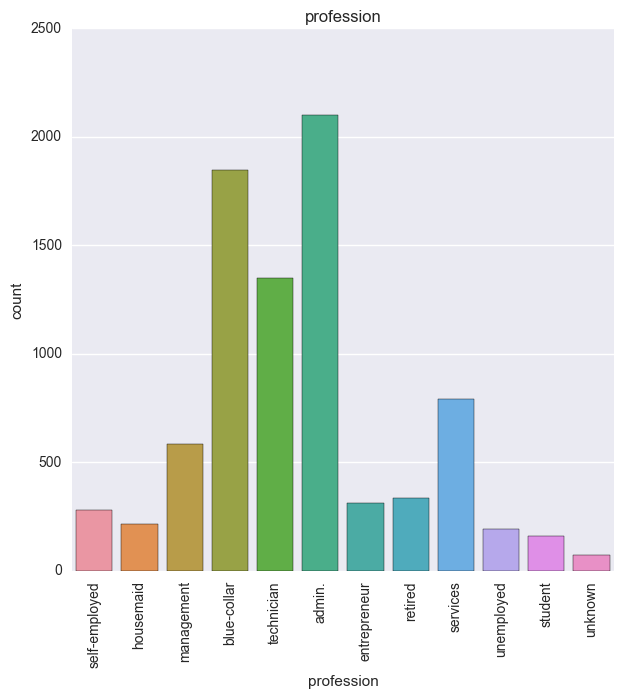

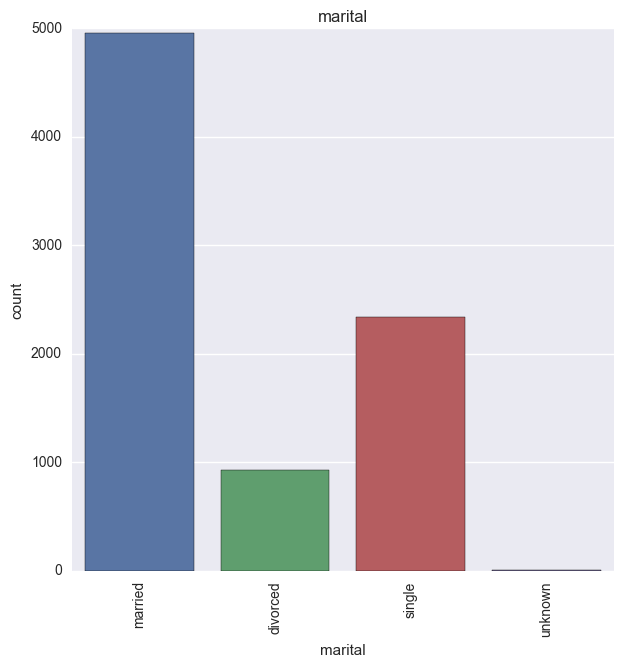

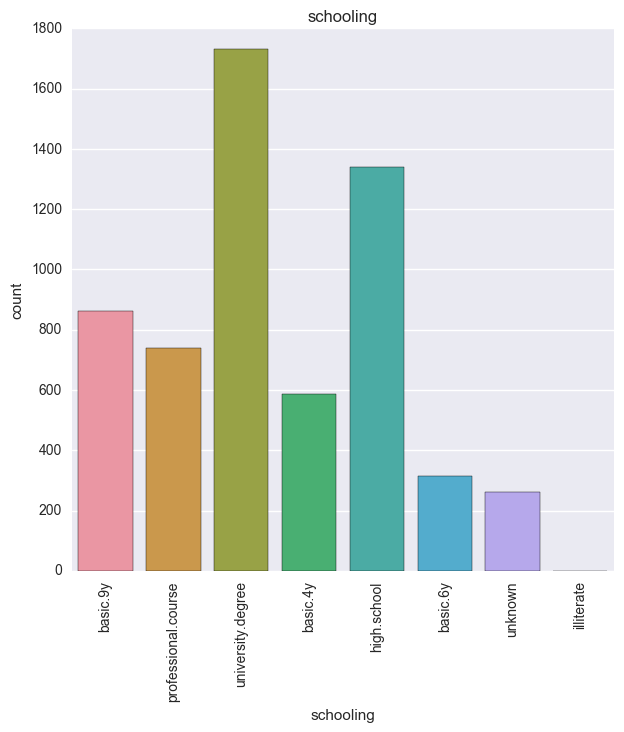

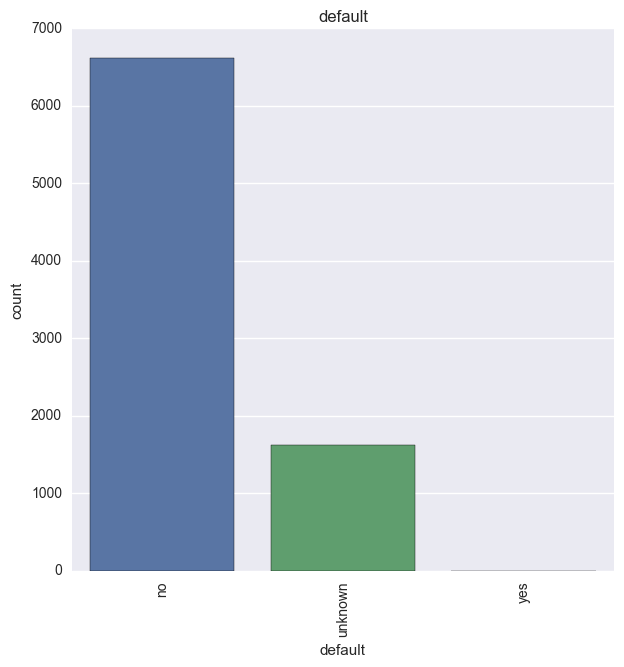

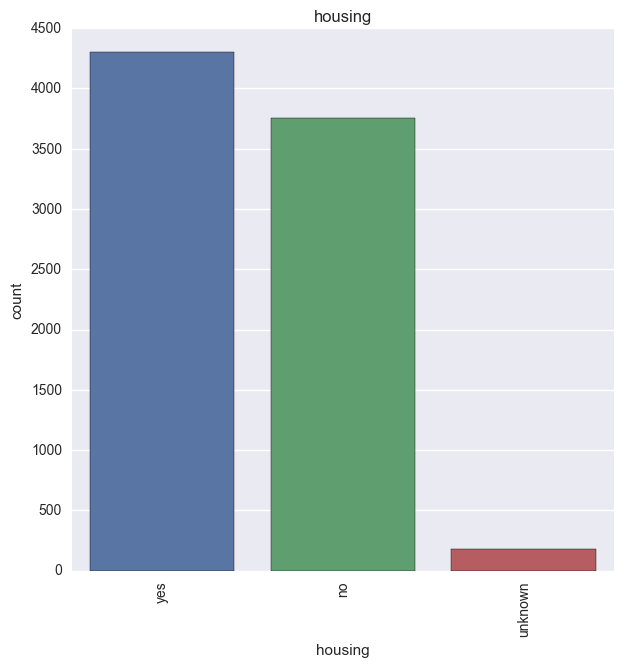

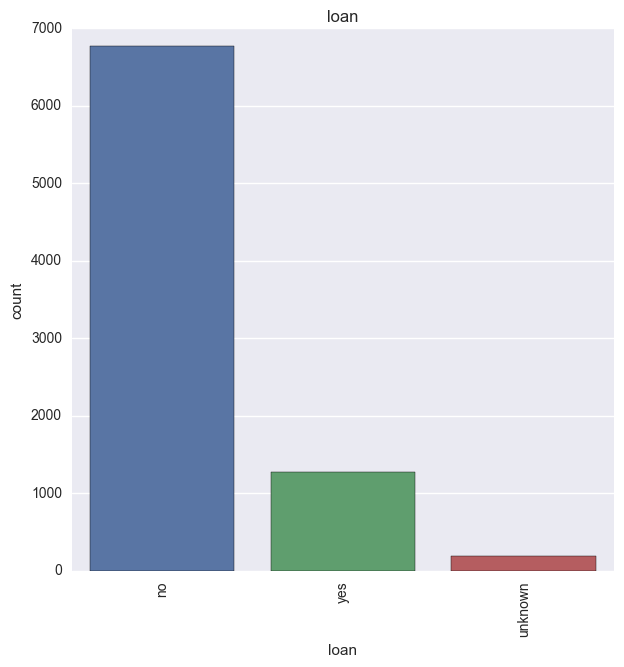

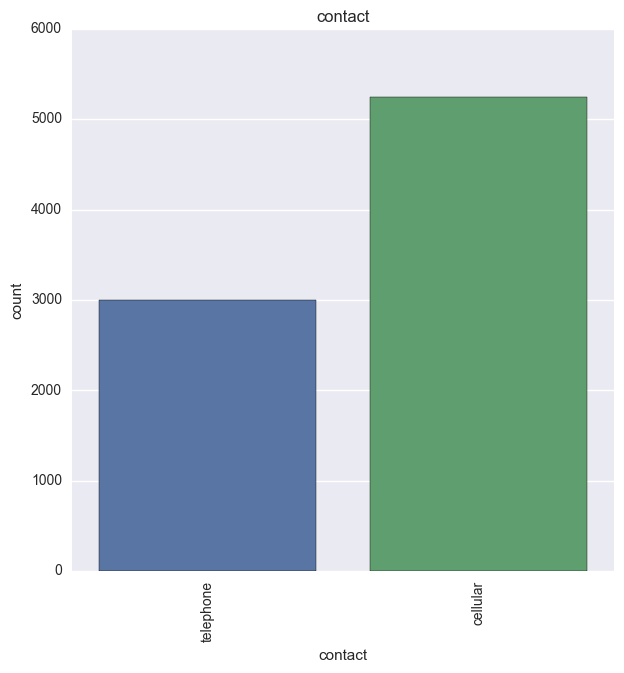

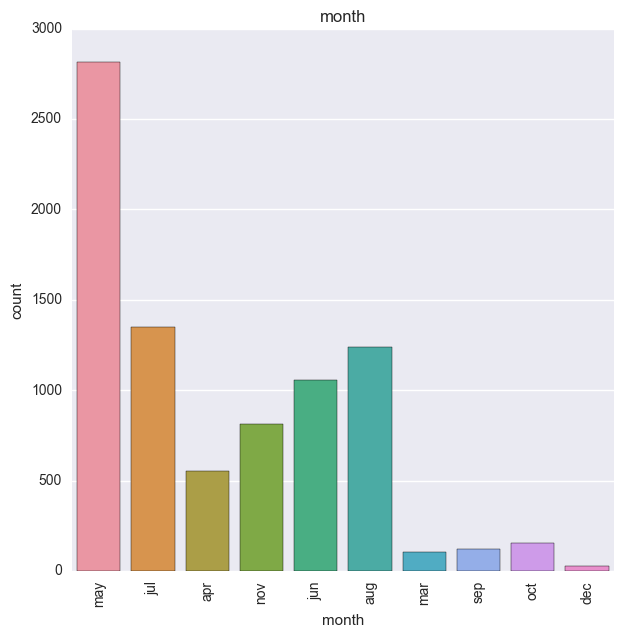

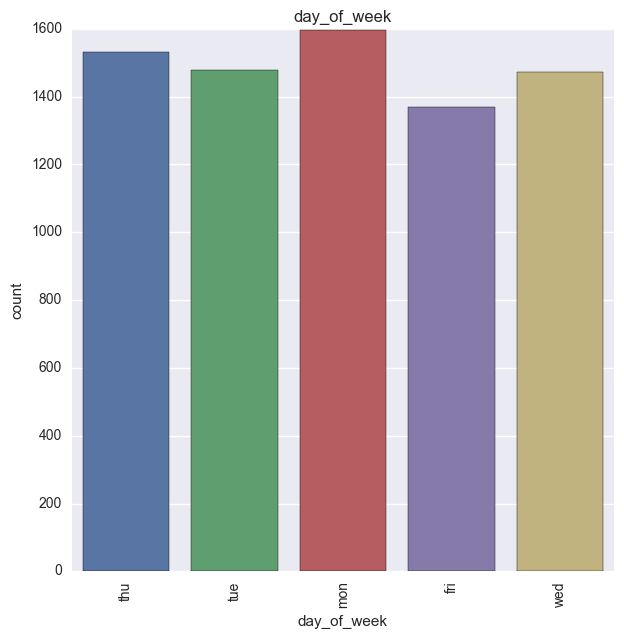

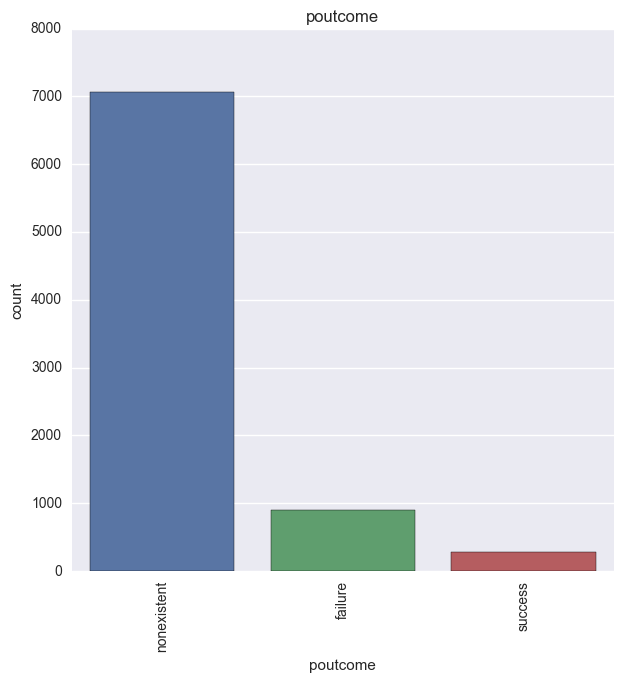

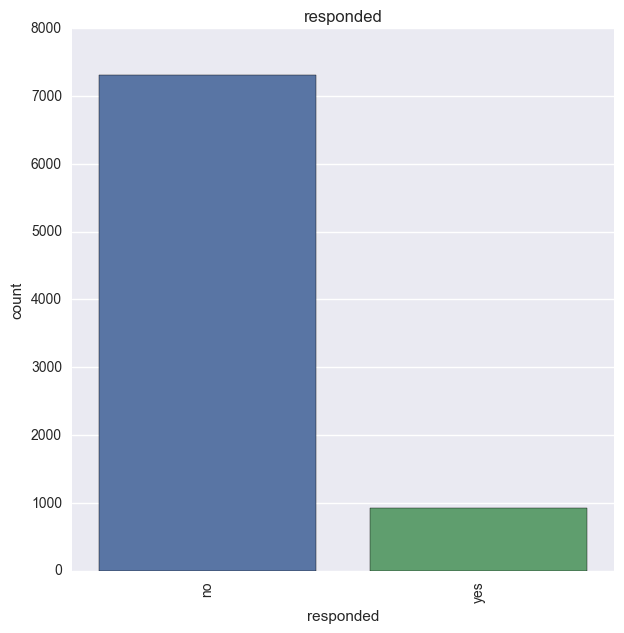

In [21]:
for col in cat_feat:
    plt.figure(figsize=(7,7))
    ax = sns.countplot(x=col, data=traindf)
    plt.xticks(rotation='vertical')
    plt.title(col)
    plt.xlabel(col)
    plt.savefig(col+'.png')
    plt.show()
    plt.close()


### 3. Data Preparation:
#### 3.1. Imputation for Missing Values
From previous analysis we learn that there are four columns have missing values. However, the 'profit' column is not caused by missing values since those 7310 people don't respond yes don't have profit for sure.
So we only need to deal with the rest three features's missing value problem.


In [22]:
mis_feat = ['custAge', 'schooling', 'day_of_week']
labels = []
values = []
for col in mis_feat:
    labels.append(col)
    values.append(traindf[col].isnull().sum())
    print(col, values[-1])

('custAge', 2014)
('schooling', 2406)
('day_of_week', 787)


Notice that 'schooling' and 'day_of_week' are both categorical responses, we can create a different response for the missing values for these columns. In that case, we only need to do the imputation of missing values for 'custAge' feature.
The first and simplest thought is replace these missing values by the mean or median age. We can compare this method's performance with the raw data later.

We create another two data frames to test different imputation methods.

In [23]:
traindf1 = deepcopy(traindf)
testdf1 = deepcopy(testdf)
print 'mean age of training set',np.nanmean(traindf1.custAge.values)
traindf1.custAge = traindf1.custAge.fillna(np.nanmean(traindf1.custAge.values))
traindf1.profit = traindf1.profit.fillna(0)

print 'mean age of test set',np.nanmean(testdf1.custAge.values)
testdf1.custAge = testdf1.custAge.fillna(np.nanmean(testdf1.custAge.values))

mean age of training set 39.9537275064
mean age of test set 40.0358519351


Use median as another replacement method:

In [24]:
traindf2 = deepcopy(traindf)
testdf2 = deepcopy(testdf)
print 'median age of training set',np.nanmedian(traindf2.custAge.values)
traindf2.custAge = traindf2.custAge.fillna(np.nanmedian(traindf2.custAge.values))
traindf2.profit = traindf2.profit.fillna(0)

print 'median age of test set',np.nanmedian(testdf2.custAge.values)
testdf2.custAge = testdf2.custAge.fillna(np.nanmean(testdf2.custAge.values))

median age of training set 38.0
median age of test set 38.0


#### 3.2.  Preprocessing categorical data:

In [25]:
print traindf1.shape
traindf1.head(3)

(8238, 24)


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,49.000000,self-employed,married,basic.9y,no,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,999.0,0,no,0.0,1
1,39.953728,housemaid,married,professional.course,no,no,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,0.0,2
2,45.000000,management,divorced,university.degree,no,no,no,cellular,apr,tue,2,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,999.0,0,no,0.0,3


Remove responded variable from input categorical features:

In [26]:
print(cat_feat)
cat_feat_input = cat_feat[:-1]

['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'responded']


Create dummy variables for those categorical reponses in both training and test datasets( dummy_na =True can take na into consideration )

In [27]:
traindf1 = pd.get_dummies(traindf1,dummy_na=True,columns=cat_feat_input)

In [28]:
testdf1 = pd.get_dummies(testdf1,dummy_na=True,columns=cat_feat_input)

Create a new combined response to indicate whether we should market this record, when the responded variable is 'yes' and the profit is more than 30.

In [29]:
y_list = [1 if traindf1.iloc[i]['responded']=='yes' and traindf1.iloc[i]['profit']>30 else 0 for i in traindf1.index]
traindf1['y'] = pd.Series(y_list,index = traindf1.index)

In [30]:
random.seed(1)

Considering the specific meaning of features, we need to remove some variables to make the input:

In [31]:
len(traindf1.columns)
all_feat = traindf1.columns.tolist()
all_feat.remove('y')
all_feat.remove('responded')
all_feat.remove('profit')
#remove id as well, since it has no specific meaning but would have some negative impact on the process of classificaiton:
all_feat.remove('id')
len(all_feat)

74

In [32]:
tempdf8 = traindf1[traindf1['y']==1]['profit']

In [33]:
tempdf8.shape

(810,)

In [34]:
sum(tempdf8.values)- tempdf8.shape[0]*30

140441.0

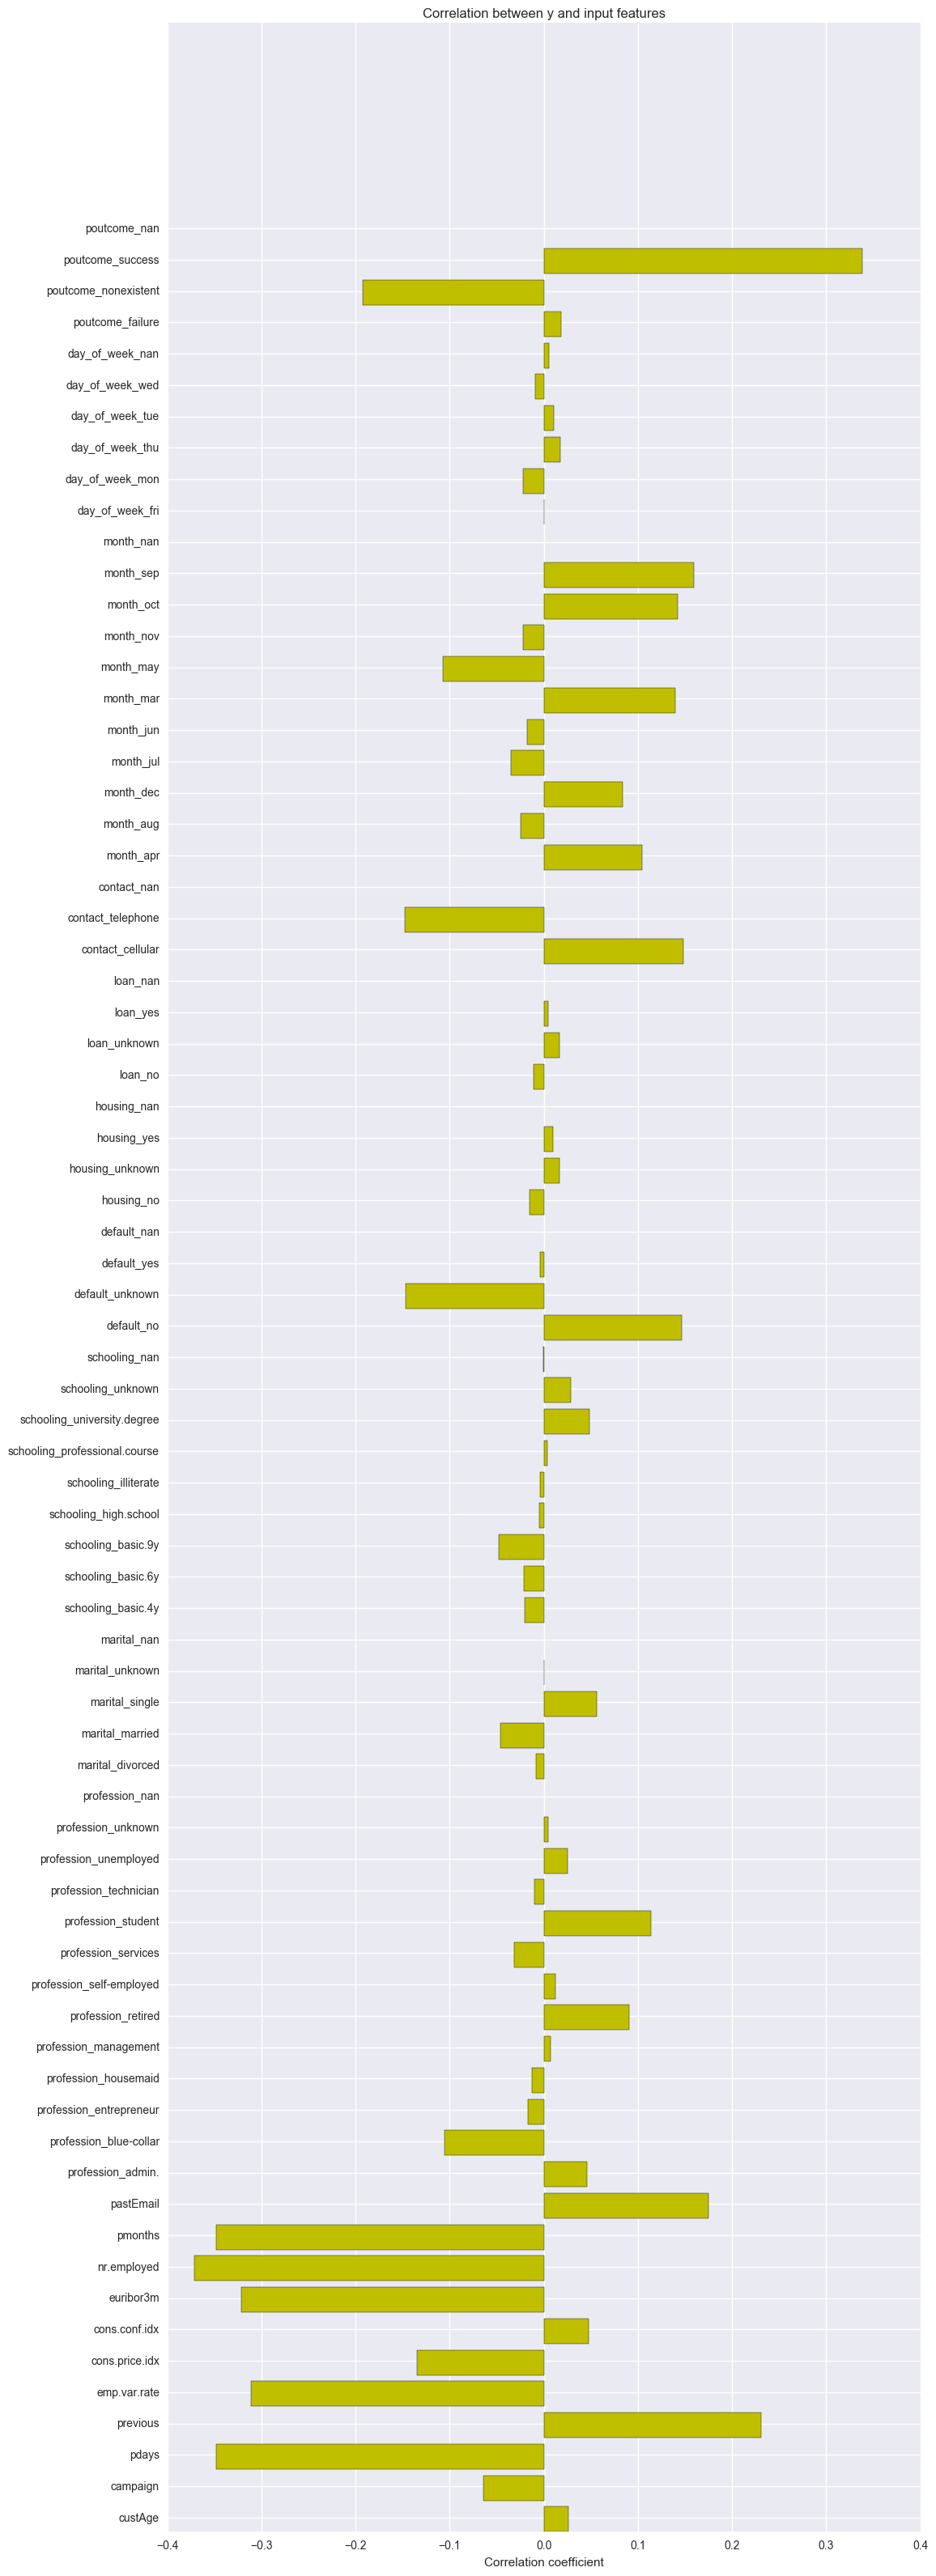

In [58]:
plt.figure(figsize=(10,10))
x_cols = [col for col in traindf1.columns if col not in ['id','responded','profit','y']]
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(traindf1[col].values, traindf1.y.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation between y and input features")
fig.savefig('Correlation between y and input features.jpg')
#autolabel(rects)
#plt.show()
#plt.savefig
#plt.close()



In [59]:
correlate_features = zip(values,labels)
sorted(correlate_features)

[(-0.37125967824880218, 'nr.employed'),
 (-0.34796599499904463, 'pmonths'),
 (-0.34790977207142076, 'pdays'),
 (-0.32170135456330318, 'euribor3m'),
 (-0.31108123419088657, 'emp.var.rate'),
 (-0.13500407383170898, 'cons.price.idx'),
 (-0.10518694703963365, 'profession_blue-collar'),
 (-0.064646152456602934, 'campaign'),
 (-0.04773078479596788, 'schooling_basic.9y'),
 (-0.046132907848256612, 'marital_married'),
 (-0.03163351737526747, 'profession_services'),
 (-0.02084578353415226, 'schooling_basic.6y'),
 (-0.020012887221752894, 'schooling_basic.4y'),
 (-0.016764924551833586, 'profession_entrepreneur'),
 (-0.012698087644975539, 'profession_housemaid'),
 (-0.0097296736830882018, 'profession_technician'),
 (-0.0085444020645975803, 'marital_divorced'),
 (-0.005252976619656049, 'schooling_high.school'),
 (-0.0036384970648357857, 'schooling_illiterate'),
 (0.00019613427205115785, 'marital_unknown'),
 (0.003477844042006913, 'schooling_professional.course'),
 (0.0044939688290193628, 'profession

### 4. Modeling
Then we create random forest classification model to fit training data:


In [110]:
correlations = []
pairs = []
tempdf7 =traindf1.corr()
for col in range(tempdf7.shape[0]):
    for row in range(tempdf7.shape[0]):
        if col != row:
            if tempdf7.ix[row][col]>=0.4 or tempdf7.ix[row][col]<=-0.4:
                correlations.append(tempdf7.ix[row][col]) 
                pairs.append((tempdf7.columns[row],tempdf7.columns[col]))
corr_pairs = zip(correlations,pairs)
sorted(corr_pairs)

[(-1.0, ('contact_cellular', 'contact_telephone')),
 (-1.0, ('contact_telephone', 'contact_cellular')),
 (-0.99961561146050903, ('default_no', 'default_unknown')),
 (-0.99961561146050903, ('default_unknown', 'default_no')),
 (-0.95611626015719453, ('housing_no', 'housing_yes')),
 (-0.95611626015719453, ('housing_yes', 'housing_no')),
 (-0.94485877754405889, ('pdays', 'poutcome_success')),
 (-0.94485877754405889, ('poutcome_success', 'pdays')),
 (-0.94439657849227965, ('pmonths', 'poutcome_success')),
 (-0.94439657849227965, ('poutcome_success', 'pmonths')),
 (-0.92255940519174551, ('loan_no', 'loan_yes')),
 (-0.92255940519174551, ('loan_yes', 'loan_no')),
 (-0.87155694095378511, ('poutcome_nonexistent', 'previous')),
 (-0.87155694095378511, ('previous', 'poutcome_nonexistent')),
 (-0.85468180564758234, ('poutcome_failure', 'poutcome_nonexistent')),
 (-0.85468180564758234, ('poutcome_nonexistent', 'poutcome_failure')),
 (-0.77398448858598812, ('marital_married', 'marital_single')),
 (-0

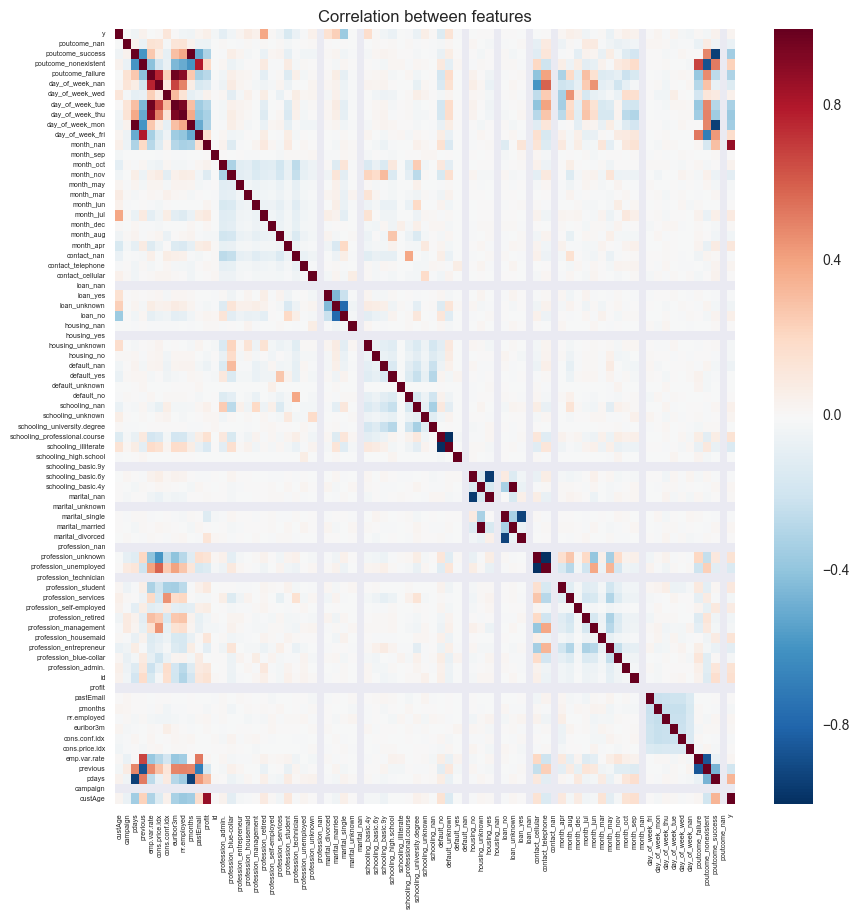

In [109]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(10,10))
corr =tempdf7
labels = tempdf7.columns
# plot the heatmap
ax = sns.heatmap(corr)#, xticklabels=corr.columns,yticklabels=corr.columns)

ax.set_yticklabels(labels, rotation='horizontal',size = 5)
ax.set_xticklabels(labels, rotation='vertical',size = 5)

ax.set_title("Correlation between features")
fig.savefig('Correlation between features.jpg')


In [61]:
clf = RandomForestClassifier(n_estimators=50,criterion="entropy")
clf = clf.fit(traindf1[all_feat],traindf1['y'])
print clf.score(traindf1[all_feat],traindf1['y'])
pred_y = clf.predict(traindf1[all_feat])


0.998421947075


In [67]:
sum(traindf1.y.values==pred_y)

8225

In [78]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(traindf1.y.values,pred_y)
metrics.auc(fpr,tpr)
#fpr,tpr

0.99252527972237181

In [71]:
print 'True Positive:',len(traindf1[(traindf1.y.values == 1)&(traindf1.y.values==pred_y)])/float(len(traindf1.y))
print 'False Positive:',len(traindf1[(traindf1.y.values == 0)&(traindf1.y.values!=pred_y)])/float(len(traindf1.y))
print 'False Negative:',len(traindf1[(traindf1.y.values == 1)&(traindf1.y.values!=pred_y)])/float(len(traindf1.y))
print 'True Negative:',len(traindf1[(traindf1.y.values == 0)&(traindf1.y.values==pred_y)])/float(len(traindf1.y))

True Positive: 0.0968681718864
False Positive: 0.000121388686574
False Negative: 0.00145666423889
True Negative: 0.901553775188


In [55]:
tp = len(traindf1[(traindf1.y.values == 1)&(traindf1.y.values==pred_y)])/float(len(traindf1.y))
fp = len(traindf1[(traindf1.y.values == 0)&(traindf1.y.values!=pred_y)])/float(len(traindf1.y))
fn = len(traindf1[(traindf1.y.values == 1)&(traindf1.y.values!=pred_y)])/float(len(traindf1.y))
print 'recall is',tp/(tp+fn)
print 'precision is', tp/(tp+fp)

recall is 0.99012345679
precision is 0.997512437811


Let's see the top 10 important features during the random forest classification and their corresponding importances:

In [57]:
importances = clf.feature_importances_.tolist()
sorted(zip(importances,all_feat),reverse=True)[:20]

[(0.11552827196121526, 'euribor3m'),
 (0.09791496250820268, 'custAge'),
 (0.05749290178339137, 'campaign'),
 (0.05148909136606265, 'nr.employed'),
 (0.03638920645134169, 'emp.var.rate'),
 (0.03370633073672531, 'pmonths'),
 (0.03368369415765118, 'cons.conf.idx'),
 (0.029837359138321543, 'cons.price.idx'),
 (0.019751610042984515, 'housing_no'),
 (0.017952270893609453, 'schooling_nan'),
 (0.01789471850572634, 'profession_admin.'),
 (0.017800691813124696, 'housing_yes'),
 (0.01733936012003313, 'marital_married'),
 (0.01696911071861421, 'schooling_university.degree'),
 (0.01655106231771353, 'pdays'),
 (0.016257509412422103, 'pastEmail'),
 (0.016057862120281974, 'default_unknown'),
 (0.015469116312673465, 'marital_single'),
 (0.015297820904459516, 'day_of_week_thu'),
 (0.015193629391164816, 'day_of_week_tue')]

### 5. Evaluation
Then we compute the objective function that we want to maximize. ( x1 indicates the count of true positive and x2 indicates false positive.)

In [66]:
x1, x2 = 0,0
profit = 0
temp_testdf = traindf1

for i in range(len(pred_y)):
    if pred_y[i] == True and temp_testdf.y.values[i] == True: 
        profit+= traindf1.ix[i,"profit"]
        x1+=1
    if pred_y[i] == True and temp_testdf.y.values[i] == False:
        x2+=1

print profit - 30*(x1+x2)

139198.0


In [31]:
clf = RandomForestClassifier(n_estimators=50,criterion="entropy")
clf = clf.fit(traindf1[all_feat],traindf1['y'])
print clf.score(traindf1[all_feat],traindf1['y'])
pred_y = clf.predict(traindf1[all_feat])

0.998421947075


In [32]:
len(all_feat)

74

Then we use 10 fold cross validation to evaluation the model:

First try, 10 tree:

In [33]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=10).fit(train_X,train_y)
    pred_y = clf.predict(test_X)
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores.append(profit - 30*(x1+x2)) 
print np.mean(cv_scores)

2855.1


Add more trees to 50 for parameter tuning:

In [34]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X,train_y)
    pred_y = clf.predict(test_X)
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores.append(profit - 30*(x1+x2)) 
print np.mean(cv_scores)

3617.6


In [88]:
#use cv to test the relationship of number of trees and performance:
cv_result = []
for num_tree in range(10,1000,20):
    kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
    cv_scores = []
    for train_idx, validation_idx in kfolding:

        train_X = traindf1.ix[train_idx,all_feat]
        test_X = traindf1.ix[validation_idx,all_feat]

        train_y = traindf1.ix[train_idx,'y']
        test_y = traindf1.ix[validation_idx,'y']

        clf = RandomForestClassifier(n_estimators=num_tree).fit(train_X,train_y)
        pred_y = clf.predict(test_X)


        x1, x2 = 0,0
        profit = 0

        for i in range(len(pred_y)):
            if pred_y[i] == True and test_y.values[i] == True: 
                profit+= traindf1.ix[test_y.index[i],"profit"]
                x1+=1
            if pred_y[i] == True and test_y.values[i] == False:
                x2+=1

        cv_scores.append(profit - 30*(x1+x2)) 
    print num_tree, np.mean(cv_scores)
    cv_result.append(np.mean(cv_scores))
    

10 3130.5
30 3462.5
50 3321.1
70 3512.7
90 3499.1
110 3320.4
130 3690.2
150 3324.5
170 3821.3
190 3436.2
210 3658.6
230 3563.0
250 3666.4
270 3544.6
290 3586.4
310 3511.5
330 3588.6
350 3439.4
370 3732.1
390 3451.1
410 3573.7
430 3711.1
450 3583.5
470 3651.6
490 3683.8
510 3564.6
530 3645.9
550 3702.1
570 3799.3
590 3715.0
610 3656.3
630 3596.9
650 3825.8
670 3550.8
690 3521.2
710 3728.3
730 3601.6
750 3668.5
770 3640.6
790 3702.9
810 3464.9
830 3625.8
850 3700.8
870 3681.4
890 3782.6
910 3624.1
930 3656.7
950 3424.6
970 3712.1
990 3656.3


In [89]:
plt.plot(range(10,1000,20),cv_result)
plt.xlabel('Number of Trees', fontsize=18)
plt.ylabel('Expected CV profit', fontsize=16) 
plt.title('Relationship between exptected profit and number of trees')
#plt.show()
plt.savefig('Expected profit and number of tree.jpg')
plt.close()

In [92]:
#use cv to test the relationship of number of trees and performance:
cv_result = []
for num_depth in range(2,500,5):
    kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
    cv_scores = []
    for train_idx, validation_idx in kfolding:

        train_X = traindf1.ix[train_idx,all_feat]
        test_X = traindf1.ix[validation_idx,all_feat]

        train_y = traindf1.ix[train_idx,'y']
        test_y = traindf1.ix[validation_idx,'y']

        clf = RandomForestClassifier(n_estimators=5,max_depth=num_depth).fit(train_X,train_y)
        pred_y = clf.predict(test_X)


        x1, x2 = 0,0
        profit = 0

        for i in range(len(pred_y)):
            if pred_y[i] == True and test_y.values[i] == True: 
                profit+= traindf1.ix[test_y.index[i],"profit"]
                x1+=1
            if pred_y[i] == True and test_y.values[i] == False:
                x2+=1

        cv_scores.append(profit - 30*(x1+x2)) 
    print num_depth, np.mean(cv_scores)
    cv_result.append(np.mean(cv_scores))
    

2 806.2
7 3162.5
12 3018.2
17 3734.1
22 3554.2
27 3379.8
32 3804.8
37 3201.4
42 3674.5
47 3680.0
52 3511.1
57 3666.6
62 3176.7
67 3021.0
72 3632.9
77 3604.6
82 3489.1
87 3521.4
92 3314.3
97 3208.8
102 3483.7
107 3807.2
112 3474.1
117 3323.4
122 3602.8
127 3698.1
132 3490.2
137 3836.8
142 3530.2
147 3527.0
152 3238.4
157 3474.1
162 3601.7
167 3306.4
172 3480.8
177 3359.3
182 3795.4
187 3466.9
192 3623.4
197 3415.3
202 3367.8
207 3766.3
212 3306.4
217 3518.9
222 3842.9
227 3263.4
232 3662.4
237 3537.5
242 3616.1
247 3804.8
252 3677.4
257 3547.2
262 3667.6
267 3694.5
272 3734.0
277 3717.8
282 3506.0
287 3661.2
292 3419.7
297 4046.1
302 3675.6
307 3839.9
312 3551.9
317 3234.3
322 3534.8
327 3391.8
332 3498.8
337 3847.0
342 3898.0
347 3449.5
352 3815.7
357 3443.9
362 3724.8
367 3524.8
372 3277.4
377 3109.7
382 3546.6
387 3901.3
392 3334.7
397 3396.5
402 3445.3
407 3706.3
412 3442.5
417 3638.5
422 3113.1
427 3784.8
432 3320.0
437 3699.5
442 3427.4
447 3186.7
452 3633.0
457 3452.2
462 3524.7


In [93]:
plt.plot(range(2,500,5),cv_result,color = "red")
plt.xlabel('Depth of Tree', fontsize=18)
plt.ylabel('Expected CV profit', fontsize=16) 
plt.title('Relationship between exptected profit and depth of trees')
#plt.show()
plt.savefig('Expected profit and depth of tree.jpg')
plt.close()

In [80]:
kfolding = KFold(n = len(traindf1),n_folds = 5, shuffle =True)
cv_scores = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X,train_y)
    pred_y = clf.predict(test_X)
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores.append(profit - 30*(x1+x2)) 
    
    fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y)
    print metrics.auc(fpr,tpr)
print np.mean(cv_scores)

0.620525552218
0.640933080289
0.627217658392
0.626266753841
0.616072131664
6869.0


Then try to use top 20 important features to do the classification (still 50 trees):


In [83]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=300).fit(train_X,train_y)
    
    importances = clf.feature_importances_.tolist()
    important_features = [item[1] for item in sorted(zip(importances,all_feat),reverse=True)[:20]]
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X.ix[:,important_features],train_y)
    pred_y = clf.predict(test_X.ix[:,important_features])
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores.append(profit - 30*(x1+x2)) 
    fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y)
    print metrics.auc(fpr,tpr)
print np.mean(cv_scores)

0.62717046342
0.607956163891
0.619465894466
0.649070645532
0.652480366811
0.628651535381
0.617541514213
0.591101027289
0.634425615898
0.601683618051
3421.3


After finishing the current model, we can also use logistic regression to make classification:

In [86]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores_rf = []
cv_scores_lr = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X,train_y)
    
    importances = clf.feature_importances_.tolist()
    important_features = [item[1] for item in sorted(zip(importances,all_feat),reverse=True)[:100]]
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X.ix[:,important_features],train_y)
    pred_y = clf.predict(test_X.ix[:,important_features])
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores_rf.append(profit - 30*(x1+x2)) 
    
    
    lgr = LogisticRegression().fit(train_X.ix[:,important_features], train_y)
    pred_y = lgr.predict(test_X.ix[:,important_features])
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores_lr.append(profit - 30*(x1+x2)) 
    
    fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y)
    print metrics.auc(fpr,tpr)
    
print np.mean(cv_scores_rf)
print np.mean(cv_scores_lr)


0.627788438474
0.612524703557
0.60566151983
0.593942603298
0.623091034166
0.602246481565
0.601443191813
0.592514822134
0.556066451903
0.618439167097
3557.1
2972.7


According to the results above, we can see random forest is outperform to logistic regression. But it may be caused by lack of parameter tuning. However, these two methods have their own advantages and disadvantages. We will talk about it later in the presentation



Make prediction for test data by using our current best model which is random forest (tree number is 50, features are top 20 important as follow)

In [37]:
important_features

['euribor3m',
 'custAge',
 'campaign',
 'nr.employed',
 'poutcome_success',
 'cons.price.idx',
 'emp.var.rate',
 'cons.conf.idx',
 'pdays',
 'pmonths',
 'housing_yes',
 'schooling_nan',
 'housing_no',
 'pastEmail',
 'profession_admin.',
 'marital_married',
 'schooling_university.degree',
 'marital_single',
 'day_of_week_mon',
 'previous']

In [38]:
clf = RandomForestClassifier(n_estimators=50,criterion="entropy")
clf = clf.fit(traindf1[important_features],traindf1['y'])

pred_y = clf.predict(testdf1[important_features])
print sum(pred_y)
print pred_y
print len(pred_y)
testdf.shape
testdf['y'] = pd.Series(pred_y,index = testdf.index)
testdf.shape

1623
[0 0 0 ..., 0 0 0]
32950


(32950, 23)

In [39]:
testdf.to_csv('testingCandidate_with_y.csv')

In [40]:
pd.read_csv('testingCandidate_with_y.csv').shape

(32950, 24)

In [42]:
pd.read_csv('testingCandidate.csv').shape

(32950, 22)